In [1]:
%cd ..

/Users/treycole/Codes/WanPy


In [2]:
from WanPy.pythTB_wan import Wannier, Bloch, K_mesh
import WanPy.models as models
import numpy as np

In [3]:
delta = 1
t0 = 0.4
tprime = 0.5

n_super_cell = 2
model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

In [4]:
random = False

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
else:
    omit_sites = 6
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)

    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"# trial wfs: {n_tfs}")
print(f"# occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")
print(f"Low energy sites: {low_E_sites}")

# trial wfs: 3
# occupied bands: 4
Wannier fraction: 0.75
Low energy sites: [0 2 4 6]


In [5]:
WFs = Wannier(model, [20, 20])
WFs.Wannierize(tf_list)

([<Figure size 640x480 with 2 Axes>], [<Axes: >])

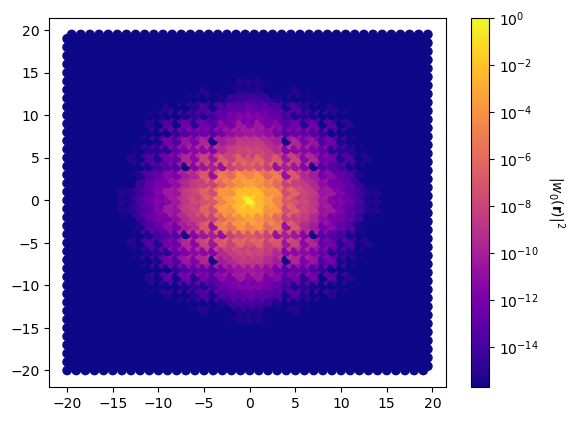

In [6]:
WFs.plot(0)

In [7]:
WFs.report()

Wannier function report:
 --------------- 
Quadratic spread = [0.29571951 0.27648419 0.27648419]
Omega_i = 0.7570854762868748
Omega_tilde = 0.09160242273619441
Wannier centers = [[-1.27657029e-17 -1.82495368e-17]
 [-2.29447893e-17  1.00000000e+00]
 [ 1.00000000e+00  1.83323638e-17]]


In [9]:
WFs.max_loc(
    verbose=True, eps=1e-3, iter_num_omega_i=10000, iter_num_omega_til=50000, 
    tol_omega_i=1e-4, tol_omega_til=1e-4, grad_min=1e-1)

0 Omega_I: 0.7554307531963592
1 Omega_I: 0.7538587954734765
2 Omega_I: 0.7523560168532486
3 Omega_I: 0.7509125210935491
4 Omega_I: 0.7495208902142915
5 Omega_I: 0.7481754257089458
6 Omega_I: 0.7468716549014744
7 Omega_I: 0.7456059995938396
8 Omega_I: 0.744375547611058
9 Omega_I: 0.7431778915558709
10 Omega_I: 0.7420110126193084
11 Omega_I: 0.7408731953033474
12 Omega_I: 0.7397629637997735
13 Omega_I: 0.7386790338298279
14 Omega_I: 0.7376202757127752
15 Omega_I: 0.7365856857177059
16 Omega_I: 0.7355743636114782
17 Omega_I: 0.7345854949015466
18 Omega_I: 0.7336183366764736
19 Omega_I: 0.7326722062322814
20 Omega_I: 0.7317464718754214
21 Omega_I: 0.7308405454411783
22 Omega_I: 0.729953876173689
23 Omega_I: 0.7290859456941169
24 Omega_I: 0.7282362638438004
25 Omega_I: 0.727404365234529
26 Omega_I: 0.7265898063733871
27 Omega_I: 0.7257921632563585
28 Omega_I: 0.7250110293459974
29 Omega_I: 0.7242460138647666
30 Omega_I: 0.7234967403491814
31 Omega_I: 0.7227628454192464
32 Omega_I: 0.7220439

In [66]:
WFs.report()

Wannier function report:
 --------------- 
Quadratic spread = [0.20055225]
Omega_i = 0.19811581802051137
Omega_tilde = 0.002436433411497217
Wannier centers = [[6.14837249e-08 1.07152087e-07]]
